# 爬取数据
参考github现成的代码，获取cookies后再调用接口爬取数据

原githu代码网址 https://github.com/longxiaofei/spider-BaiduIndex

In [ ]:
import time
import pandas as pd
from qdata.baidu_index import get_search_index
from qdata.baidu_index.common import split_keywords


keywords_list = [['携程'], ['去哪儿'], ['同程网'],['马蜂窝'],['途牛网'],['穷游网'],['同城旅行'],['飞猪'],['艺龙']]
cookies = """BDUSS=jI0ZjFofkhWTGxqaVc1Zi16NnVHanpnTFV0Z3JBUmZIR05nb3d4ai1SVFJsRGxqSVFBQUFBJCQAAAAAAAAAAAEAAABn0QcceG5tYmMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANEHEmPRBxJjQ;STOKEN=89bcba91b69b59ec6a2d5124eacf0153575c69543d258c6d08884024a6919bd7; """

data_df = pd.DataFrame()

for keywords in split_keywords(keywords_list):
    for index in get_search_index(
        keywords_list=keywords,
        start_date='2019-01-01',
        end_date='2022-08-01',
        cookies=cookies
    ):
        if index['type'] == 'all':
            data_df = pd.concat([data_df, data_df.from_dict(index)], ignore_index=True)
            # print(index)
    time.sleep(15)

data_df.to_csv('指数数据.csv',encoding='gbk',index=False)


# 存为月度数据
data_df['date']=pd.to_datetime(data_df.date) 
data_df['date']=data_df['date'].dt.to_period('M') 
data_df.groupby(['keyword','date']).mean().to_csv('月度数据.csv',encoding='gbk')

# 画图

timeline来源

https://matplotlib.org/stable/gallery/lines_bars_and_markers/timeline.html#sphx-glr-gallery-lines-bars-and-markers-timeline-py

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
from matplotlib import rcParams
from datetime import datetime
# rcParams配置文件，用来定义各种变量的，这里用来定义字体
config = {
    "font.family":'serif',
    "font.size": 18,
    "mathtext.fontset":'stix', # 表示可以用latex写公式，stix类似于Time News Romen
    "font.serif": ['SimSun'], # 表示中文用的是宋体
    "figure.constrained_layout.use" : False,
}
rcParams.update(config) # 后更新配置，防止字体设置被覆盖
data_df=pd.read_csv('月度数据.csv',encoding='gbk')
data_df['date'] = [datetime.strptime(d, "%Y-%m") for d in data_df['date']]
# data_df['date'] = pd.to_datetime(data_df.date, format='%Y/%m/%d') 
# data_df['date'] = data_df['date'].dt.strftime('%Y-%m-%d')
fig, ax = plt.subplots(1,1)
# ax.xaxis.set_major_locator(ticker.MultipleLocator(5))

# plt.xticks(rotation=90)

# sns.lineplot(data=data_df, x='date', y='index', hue='keyword',style="keyword")
sns.lineplot(x='date',y='index',hue='keyword',data=data_df)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
# ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
plt.ylabel('log百度指数')
plt.show()

In [3]:
quote("https://raw.githubusercontent.com/1205129045x/baiduindex/master/月度数据.csv", safe=b)

'https://raw.githubusercontent.com/1205129045x/baiduindex/master/%E6%9C%88%E5%BA%A6%E6%95%B0%E6%8D%AE.csv'

In [4]:
import pandas as pd
from urllib.parse import quote
b = b'/:?='
url=quote("https://raw.githubusercontent.com/1205129045x/baiduindex/master/月度数据.csv", safe=b)
df = pd.read_csv(url, encoding='gbk')

In [5]:
df

,keyword,date,index
0,去哪儿,2019-01,16137.451613
1,去哪儿,2019-02,11814.607143
2,去哪儿,2019-03,11024.354839
3,去哪儿,2019-04,12029.466667
4,去哪儿,2019-05,11522.064516
...,...,...,...
347,马蜂窝,2022-04,2906.633333
348,马蜂窝,2022-05,2591.903226
349,马蜂窝,2022-06,3679.600000
350,马蜂窝,2022-07,5214.032258


: 

In [10]:
pip install urllib

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement urllib (from versions: none)
ERROR: No matching distribution found for urllib


In [21]:
import pandas as pd
from urllib.parse import quote as quote
b = b'/:?='
url=quote("https://raw.githubusercontent.com/1205129045x/baiduindex/master/月度数据.csv", safe=b)
# df = pd.read_csv('url', encoding='gbk')

In [ ]:
url

'https://raw.githubusercontent.com/1205129045x/baiduindex/master/%E6%9C%88%E5%BA%A6%E6%95%B0%E6%8D%AE.csv'

In [ ]:
pd.read_csv(url,encoding='gbk')

URLError: <urlopen error [Errno 11004] getaddrinfo failed>

In [1]:
import urllib

In [2]:
urllib.request.urlopen('https://www.google.com')

URLError: <urlopen error [WinError 10060] 由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。>

In [3]:
url='https://github.com/1205129045x/baiduindex/blob/master/%E6%9C%88%E5%BA%A6%E6%95%B0%E6%8D%AE.csv'

In [4]:
urllib.request.urlopen(url)

In [5]:

import pandas as pd
pd.read_csv('https://raw.githubusercontent.com/1205129045x/baiduindex/master/%E6%9C%88%E5%BA%A6%E6%95%B0%E6%8D%AE.csv',encoding='gbk')

,keyword,date,index
0,去哪儿,2019-01,16137.451613
1,去哪儿,2019-02,11814.607143
2,去哪儿,2019-03,11024.354839
3,去哪儿,2019-04,12029.466667
4,去哪儿,2019-05,11522.064516
...,...,...,...
347,马蜂窝,2022-04,2906.633333
348,马蜂窝,2022-05,2591.903226
349,马蜂窝,2022-06,3679.600000
350,马蜂窝,2022-07,5214.032258


: 

In [20]:

from urllib.parse import quote as quote

b = b'/:?='

print(quote("http://dotamax.com/search/?q=意", b)) 

http://dotamax.com/search/?q=%E6%84%8F


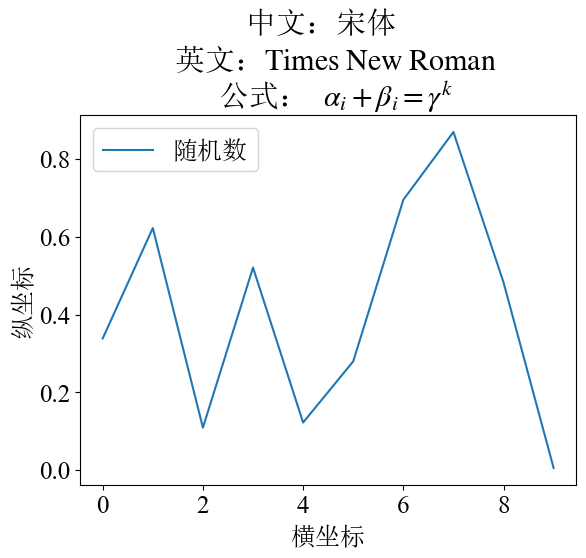

In [1]:
plt.plot(x,label='随机数')
plt.title('中文：宋体 \n 英文：$\mathrm{Times \; New \; Roman}$ \n 公式： $\\alpha_i + \\beta_i = \\gamma^k$')
plt.xlabel('横坐标')
plt.ylabel('纵坐标')
plt.legend()
plt.yticks(fontproperties='Times New Roman', size=18)
plt.xticks(fontproperties='Times New Roman', size=18)
plt.show()

In [9]:
plt.plot(x,label='随机数')
plt.title('中文：宋体 \n 英文：$\mathrm{Times \  \\\  New \ Roman}$ \n 公式： $\\alpha_i + \\beta_i = \\gamma^k$')
plt.xlabel('横坐标')
plt.ylabel('纵坐标')
plt.legend()
plt.yticks(fontproperties='Times New Roman', size=18)
plt.xticks(fontproperties='Times New Roman', size=18)
plt.show()

ValueError: 
\mathrm{Times \  \\  New \ Roman}
                 ^
Unknown symbol: \, found '\'  (at char 17), (line:1, col:18)

<Figure size 640x480 with 1 Axes>